In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [3]:
#Load the dataset

train_df = pd.read_csv("C:/Users/welcome/Downloads/CMAPSSData/train_FD001.txt",sep=" ",header=None)
test_df = pd.read_csv("C:/Users/welcome/Downloads/CMAPSSData/test_FD001.txt",sep=" ",header=None)
rul_df = pd.read_csv("C:/Users/welcome/Downloads/CMAPSSData/RUL_FD001.txt",sep=" ",header=None)

train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000,0.0,0.0
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705,NaN,NaN
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251,NaN,NaN
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200,NaN,NaN
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800,NaN,NaN
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900,NaN,NaN
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800,NaN,NaN
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400,NaN,NaN


In [4]:
train_df.drop(columns=[26,27],inplace=True)
test_df.drop(columns=[26,27],inplace=True)

In [5]:
columns = ['unit_number','time_in_cycles','setting_1','setting_2','TRA','T2','T24','T30','T50','P2','P15','P30','Nf',
           'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32' ]
train_df.columns = columns
test_df.columns = columns

# Rename RUL columns
rul_df.columns = ['RUL', 'NaN']
rul_df = rul_df.drop(columns=['NaN'])

# Display basic information about the datasets
print("Train Dataset Info:")
print(train_df.info())
print("\nTest Dataset Info:")
print(test_df.info())
print("\nRUL Dataset Info:")
print(rul_df.info())

# Display first few rows of each dataset
print("\nFirst 5 rows of Train Dataset:")
print(train_df.head())
print("\nFirst 5 rows of Test Dataset:")
print(test_df.head())
print("\nFirst 5 rows of RUL Dataset:")
print(rul_df.head())

# Summary statistics
print("\nTrain Dataset Statistics:")
print(train_df.describe())
print("\nTest Dataset Statistics:")
print(test_df.describe())

Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   unit_number     20631 non-null  int64  
 1   time_in_cycles  20631 non-null  int64  
 2   setting_1       20631 non-null  float64
 3   setting_2       20631 non-null  float64
 4   TRA             20631 non-null  float64
 5   T2              20631 non-null  float64
 6   T24             20631 non-null  float64
 7   T30             20631 non-null  float64
 8   T50             20631 non-null  float64
 9   P2              20631 non-null  float64
 10  P15             20631 non-null  float64
 11  P30             20631 non-null  float64
 12  Nf              20631 non-null  float64
 13  Nc              20631 non-null  float64
 14  epr             20631 non-null  float64
 15  Ps30            20631 non-null  float64
 16  phi             20631 non-null  float64
 17  NRf        

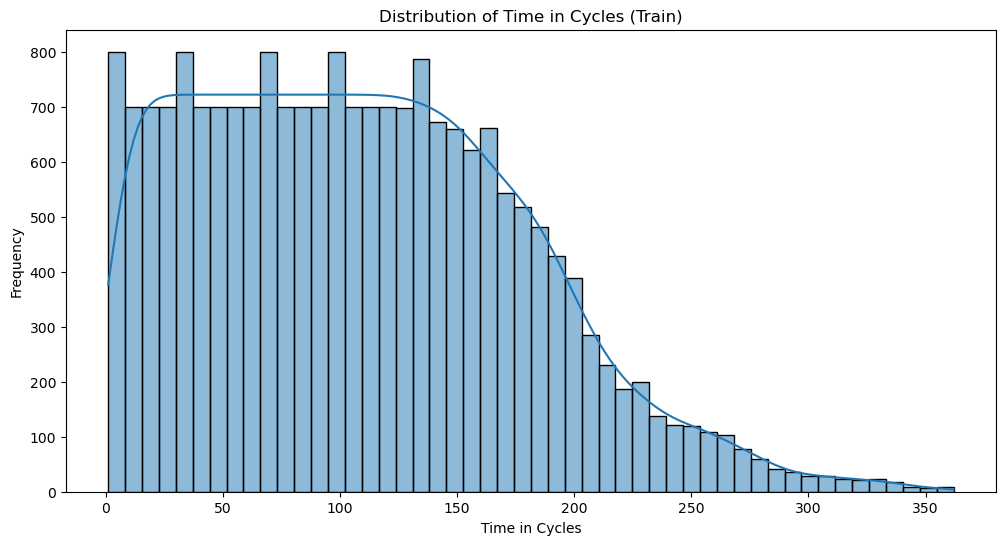

In [6]:
# Plotting
# Time in cycles distribution
plt.figure(figsize=(12, 6))
sns.histplot(train_df['time_in_cycles'], bins=50, kde=True)
plt.title('Distribution of Time in Cycles (Train)')
plt.xlabel('Time in Cycles')
plt.ylabel('Frequency')
plt.show()

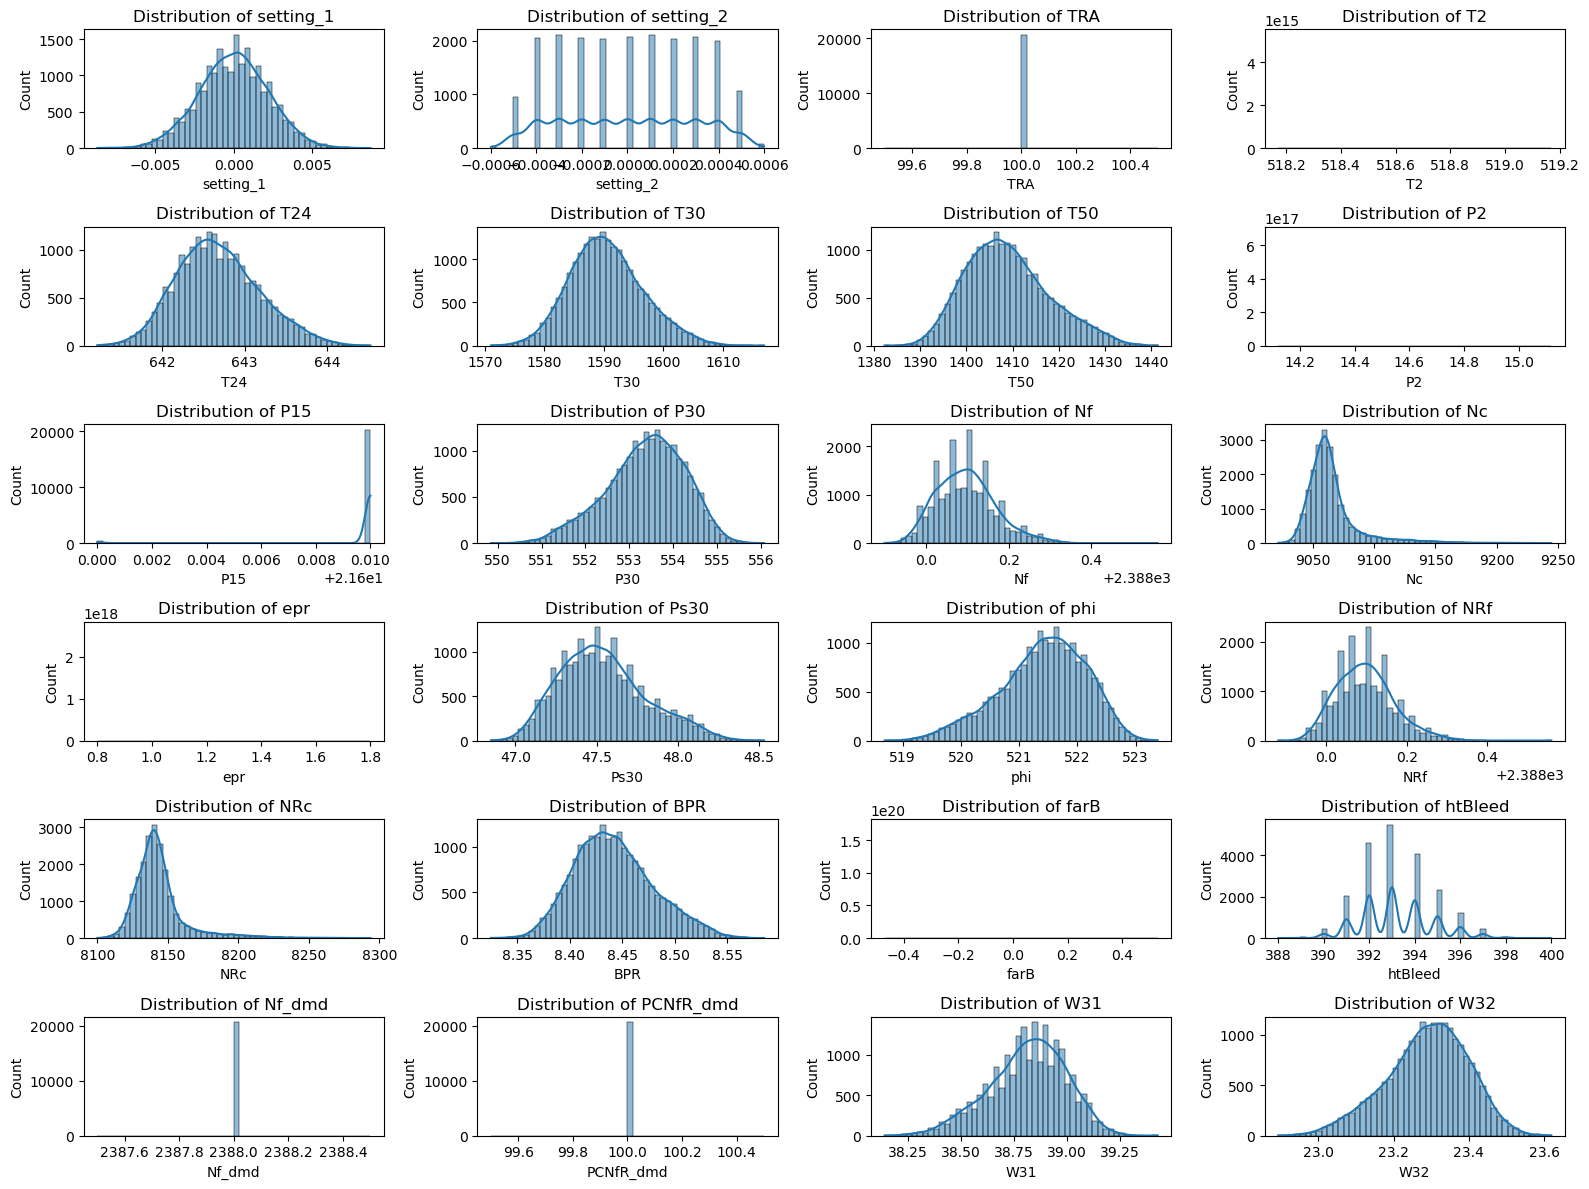

In [7]:
# Settings and sensors distributions
columns_to_plot = ['setting_1', 'setting_2', 'TRA', 'T2', 'T24', 'T30', 'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf', 'NRc', 'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32']
plt.figure(figsize=(16, 12))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(6, 4, i)
    sns.histplot(train_df[column], bins=50, kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

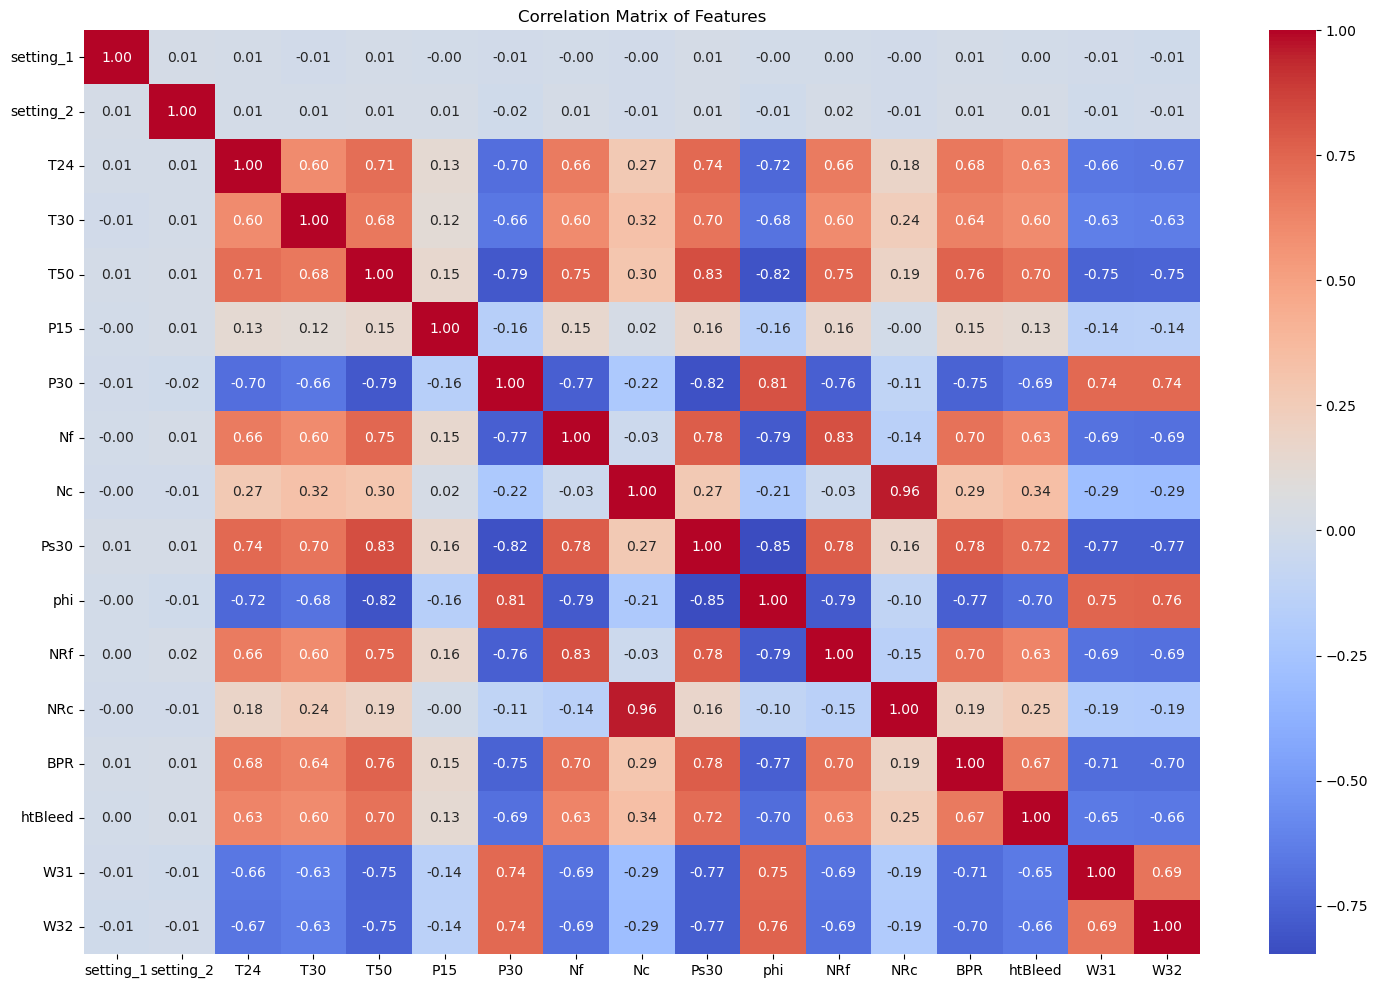

In [8]:
#delete columns with constant values that do not carry information about the state of the unit
train_df.drop(columns=['Nf_dmd','PCNfR_dmd','P2','T2','TRA','farB','epr'],inplace=True)

#update columns to plot
columns_to_plot = ['setting_1', 'setting_2', 'T24', 'T30', 'T50', 'P15', 'P30', 'Nf', 'Nc', 'Ps30', 'phi', 'NRf', 'NRc', 'BPR', 'htBleed', 'W31', 'W32']

# Correlation matrix
plt.figure(figsize=(18, 12))
correlation_matrix = train_df[columns_to_plot].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

In [9]:
# Function to calculate RUL for each unit in the training dataset
def calculate_rul(df):
    max_cycle = df.groupby('unit_number')['time_in_cycles'].max().reset_index()
    max_cycle.columns = ['unit_number', 'max_time_in_cycles']
    df = df.merge(max_cycle, on='unit_number', how='left')
    df['RUL'] = df['max_time_in_cycles'] - df['time_in_cycles']
    df = df.drop('max_time_in_cycles', axis=1)
    return df

# Calculate RUL for training dataset
train_df = calculate_rul(train_df)

# Display the first few rows to check the RUL calculation
print("\nFirst 5 rows of Train Dataset with RUL:")
print(train_df.head())

# Prepare the test dataset
# Test dataset's RUL values are in the RUL dataset
# Merge the RUL dataset with the test dataset

# Add unit_number column to RUL dataset
rul_df['unit_number'] = range(1, len(rul_df) + 1)

# Add RUL values to the test dataset
test_max_cycle = test_df.groupby('unit_number')['time_in_cycles'].max().reset_index()
test_max_cycle.columns = ['unit_number', 'max_time_in_cycles']
test_df = test_df.merge(test_max_cycle, on='unit_number', how='left')
test_df = test_df.merge(rul_df, on='unit_number', how='left')
test_df['RUL'] = test_df['RUL'] + test_df['max_time_in_cycles'] - test_df['time_in_cycles']
test_df = test_df.drop('max_time_in_cycles', axis=1)

# Display the first few rows to check the merge
print("\nFirst 5 rows of Test Dataset with RUL:")
print(test_df.head())

# Handle NaN values by filling with the median value
train_df.fillna(train_df.median(), inplace=True)
test_df.fillna(test_df.median(), inplace=True)


First 5 rows of Train Dataset with RUL:
   unit_number  time_in_cycles  setting_1  setting_2     T24      T30  \
0            1               1    -0.0007    -0.0004  641.82  1589.70   
1            1               2     0.0019    -0.0003  642.15  1591.82   
2            1               3    -0.0043     0.0003  642.35  1587.99   
3            1               4     0.0007     0.0000  642.35  1582.79   
4            1               5    -0.0019    -0.0002  642.37  1582.85   

       T50    P15     P30       Nf       Nc   Ps30     phi      NRf      NRc  \
0  1400.60  21.61  554.36  2388.06  9046.19  47.47  521.66  2388.02  8138.62   
1  1403.14  21.61  553.75  2388.04  9044.07  47.49  522.28  2388.07  8131.49   
2  1404.20  21.61  554.26  2388.08  9052.94  47.27  522.42  2388.03  8133.23   
3  1401.87  21.61  554.45  2388.11  9049.48  47.13  522.86  2388.08  8133.83   
4  1406.22  21.61  554.00  2388.06  9055.15  47.28  522.19  2388.04  8133.80   

      BPR  htBleed    W31      W32  RUL

In [11]:
# Select features and target
features = columns_to_plot
target = 'RUL'

X_train = train_df[features]
y_train = train_df[target]

X_test = test_df[features]
y_test = test_df[target]

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Train Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

# Evaluate models
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    return rmse, mae

rf_rmse, rf_mae = evaluate_model(y_test, rf_predictions)
gb_rmse, gb_mae = evaluate_model(y_test, gb_predictions)

print(f"Random Forest - RMSE: {rf_rmse}, MAE: {rf_mae}")
print(f"Gradient Boosting - RMSE: {gb_rmse}, MAE: {gb_mae}")

Random Forest - RMSE: 46.35289074372091, MAE: 35.01491447770311
Gradient Boosting - RMSE: 45.75758460106357, MAE: 34.44352739298836


In [12]:
# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape for LSTM input [samples, time steps, features]
X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Define LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

# Fit the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lstm_model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping], verbose=1)

# Make predictions
lstm_predictions = lstm_model.predict(X_test_scaled).flatten()

# Evaluate LSTM model
lstm_rmse, lstm_mae = evaluate_model(y_test, lstm_predictions)

print(f"LSTM - RMSE: {lstm_rmse}, MAE: {lstm_mae}")

C:\Users\welcome\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 12902.2119 - val_loss: 7348.0254
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 4640.1523 - val_loss: 5665.4004
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 3386.1638 - val_loss: 4283.9580
Epoch 4/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 2262.3528 - val_loss: 3361.4810
Epoch 5/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 1926.5612 - val_loss: 3105.1602
Epoch 6/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1876.7316 - val_loss: 3052.7676
Epoch 7/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1787.2384 - val_loss: 2977.9683
Epoch 8/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1741.6719 - val_loss: 2972.3420
Epoch 9/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1765.4172 - val_loss: 2971.7913
Epoch 10/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1716.2225 - val_loss: 2931.3464
Epoch 11/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1652.

In [13]:
print("\nModel Performance Summary:")
print(f"Random Forest - RMSE: {rf_rmse:.2f}, MAE: {rf_mae:.2f}")
print(f"Gradient Boosting - RMSE: {gb_rmse:.2f}, MAE: {gb_mae:.2f}")
print(f"LSTM - RMSE: {lstm_rmse:.2f}, MAE: {lstm_mae:.2f}")


Model Performance Summary:
Random Forest - RMSE: 46.35, MAE: 35.01
Gradient Boosting - RMSE: 45.76, MAE: 34.44
LSTM - RMSE: 47.04, MAE: 35.50


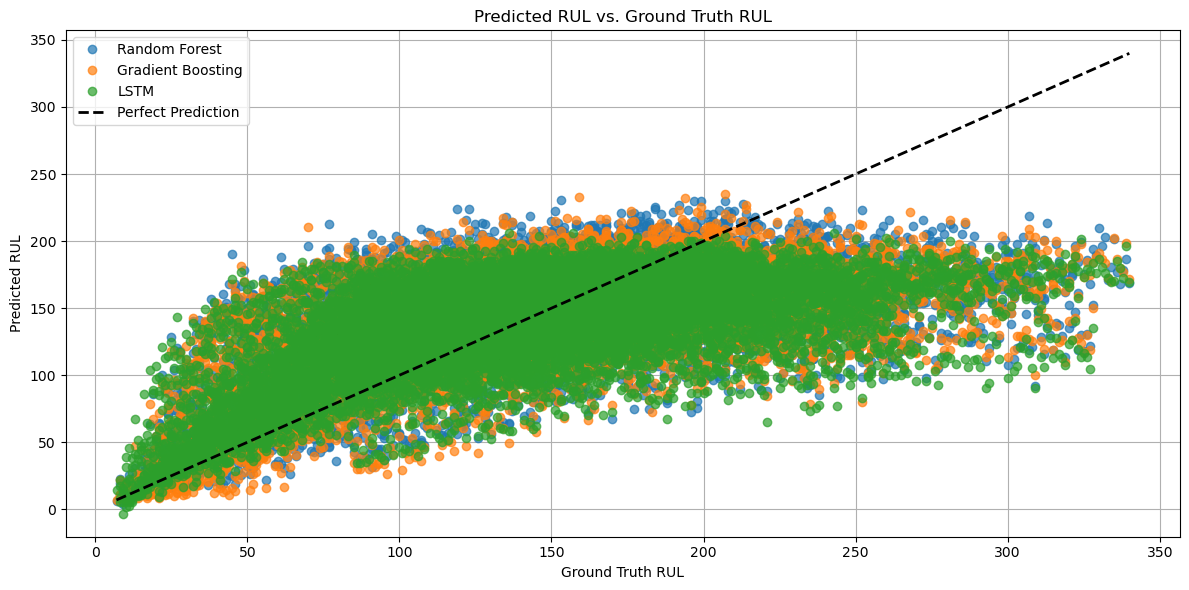

In [14]:
# Extract ground truth RUL values from the test dataset
ground_truth = y_test

# Plotting
plt.figure(figsize=(12, 6))

# Plotting Random Forest predictions
plt.plot(ground_truth, rf_predictions, 'o', label='Random Forest', alpha=0.7)

# Plotting Gradient Boosting predictions
plt.plot(ground_truth, gb_predictions, 'o', label='Gradient Boosting', alpha=0.7)

# Plotting LSTM predictions
plt.plot(ground_truth, lstm_predictions, 'o', label='LSTM', alpha=0.7)

# Plotting the line of perfect prediction (y=x)
plt.plot([min(ground_truth), max(ground_truth)], [min(ground_truth), max(ground_truth)], 'k--', lw=2, label='Perfect Prediction')

plt.title('Predicted RUL vs. Ground Truth RUL')
plt.xlabel('Ground Truth RUL')
plt.ylabel('Predicted RUL')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()